<a href="https://colab.research.google.com/github/thaispatricio9/compras_analise_BI/blob/main/01_tratamento_e_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tratamento e Análise de Dados

- Investigar e corrigir (se possível) anomalias nos dados
- Análise Exploratória

## Importar bibliotecas

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()

## Carregar dados

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dir = '/content/drive/MyDrive/Curriculo/Lambda3'
arq = 'sample.xls'

In [4]:
df = pd.read_excel(f'{dir}/{arq}')

## Investigar anomalias

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
df.set_index('Row ID', inplace=True)

**Verificar nulos, tipos e duplicados**
- Não há valores nulos
- Todos os tipos das colunas fazem sentido, variáveis de data e númericas já estão formatadas corretamente.
- Há um pedido duplicado


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 n

In [8]:
df[df.duplicated()==True]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
3407,US-2014-150119,2014-04-23,2014-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [9]:
df = df[df.duplicated()==False]

In [10]:
df.nunique()

Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            6144
Quantity           14
Discount           12
Profit           7545
dtype: int64

**Verificar Datas**

In [11]:
min(df['Order Date']), max(df['Order Date'])

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [12]:
min(df['Ship Date']), max(df['Ship Date'])

(Timestamp('2014-01-07 00:00:00'), Timestamp('2018-01-05 00:00:00'))

O Range de datas parece correto, sem datas absurdas como 2050 ou 1900

In [42]:
df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days

In [44]:
df.groupby(['Ship Mode']).agg({'Delivery Time': ['mean','max','min']})

Delivery Time        
                        mean max min
Ship Mode                           
First Class         2.182705   4   1
Same Day            0.044199   1   0
Second Class        3.238046   5   1
Standard Class      5.006704   7   3

O tempo de entrega é aderente ao tipo de entrega contratado. Em uma análise mais apronfundae eu compararia o tempo de entrega prometido ao cliente em cada um dos tipos e analisaria a evolução do tempo de entrega no tempo e por estado para verificar possíveis gargalos.

**Veriricar outras variáveis**

In [13]:
# Apenas os EUA, como esperado
df['Country'].unique()

array(['United States'], dtype=object)

In [14]:
df.groupby(['State'])['Order ID'].size().to_frame()

,Order ID
State,
Alabama,61
Arizona,224
Arkansas,60
California,2001
Colorado,182
Connecticut,82
Delaware,96
District of Columbia,10
Florida,383


Temos 49 estados, o único que não aparece é o Alasca o que é compreensivo devido ao isolamento geográfico do estado em relação ao restante dos Estados Unidos.

In [15]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

Faltou a região North: Os estados estão sendo atribuidos a região errada ou é apenas a divisão de região usada pela empresa?

Se tivesse mais tempo investigaria mais profundamente essa questão.

In [ ]:
df.groupby(['Ship Mode'])['Order ID'].size().to_frame()

,Order ID
Ship Mode,
First Class,1538
Same Day,543
Second Class,1945
Standard Class,5967


In [ ]:
df.groupby(['Customer Name'])['Customer ID'].nunique().nlargest(10)

Customer Name
Aaron Bergman         1
Aaron Hawkins         1
Aaron Smayling        1
Adam Bellavance       1
Adam Hart             1
Adam Shillingsburg    1
Adrian Barton         1
Adrian Hane           1
Adrian Shami          1
Aimee Bixby           1
Name: Customer ID, dtype: int64

Ok! Só temos um ID para Customer Name

Se tivesse mais tempo eu investigaria se temos consumidores com o mesmo nome que estão recebendo, erroneamente, IDs iguais.



In [20]:
df.groupby(['Segment'])['Customer Name'].size().to_frame()

,Customer Name
Segment,
Consumer,5191
Corporate,3020
Home Office,1782


In [17]:
df.groupby(['Customer Name', 'Segment'])['State'].nunique().nlargest(20)

Customer Name         Segment    
Dean percer           Home Office    11
Chris Cortes          Consumer       10
Christine Sundaresam  Consumer       10
Emily Phan            Consumer       10
Noel Staavos          Corporate      10
Paul Prost            Home Office    10
Resi Pölking          Consumer       10
Rick Bensley          Home Office    10
Sanjit Jacobs         Home Office    10
Zuschuss Carroll      Consumer       10
Adam Hart             Corporate       9
Arthur Gainer         Consumer        9
Brian Moss            Corporate       9
Bryan Mills           Consumer        9
Chloris Kastensmidt   Consumer        9
Chris Selesnick       Corporate       9
Christina Anderson    Consumer        9
Clay Ludtke           Consumer        9
Clytie Kelty          Consumer        9
Damala Kotsonis       Corporate       9
Name: State, dtype: int64

Existem pessoas do segmento Consumer que fazem compras para até 10 estados distintos, será que as categorias estão corretas? Me parece que essas compras podem ser, na verdade, Corporate.

O que é o segmento Home Office? Empresas remotas? Qual a diferença para o Corporate?

**Variável Profit**

In [45]:
max(df['Profit']), df['Profit'].mean(), min(df['Profit'])

(8399.975999999999, 28.660970729510783, -6599.978000000001)

In [54]:
df['Order ID'][df['Profit']<0].count()

1870

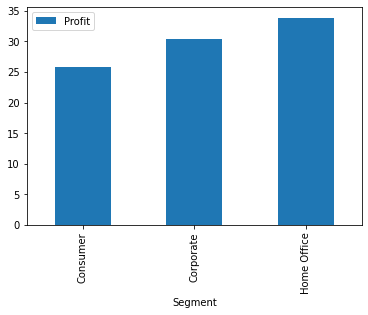

In [25]:
df.groupby(['Segment'])['Profit'].mean().to_frame().plot.bar()

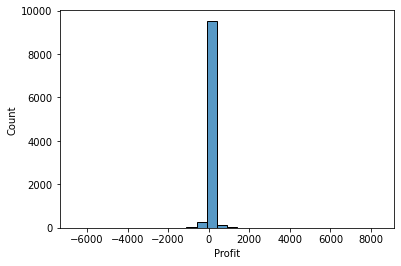

In [51]:
sns.histplot(df['Profit'], bins= 30)

Me preocupa termos 1870 pedidos com profit negativos, investigaria melhor essa questão.

**Verificar evolução dos pedidos ao longo do tempo**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


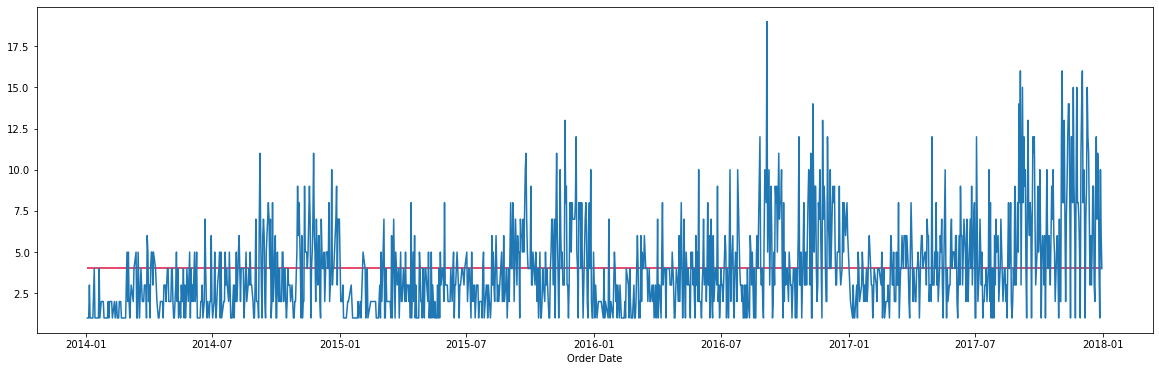

In [74]:
plt.figure(figsize=(20,6))
pedidos = df.groupby(df['Order Date'].dt.date)['Order ID'].nunique()
sns.lineplot(pedidos.index, pedidos.values)
plt.hlines(pedidos.values.mean(), xmax=df['Order Date'].max(), xmin=df['Order Date'].min(), colors='crimson');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


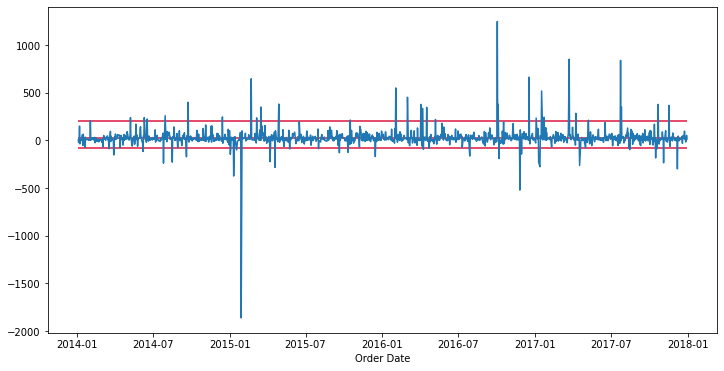

In [89]:
plt.figure(figsize=(12,6))
profit = df.groupby(df['Order Date'].dt.date)['Profit'].mean()
sns.lineplot(profit.index, profit.values)
plt.hlines(profit.values.mean(), xmax=df['Order Date'].max(), xmin=df['Order Date'].min(), colors='crimson')
# definir área de 95% dos dados
plt.hlines(profit.quantile(q=0.975), xmax=df['Order Date'].max(), xmin=df['Order Date'].min(), colors='crimson')
plt.hlines(profit.quantile(q=0.025), xmax=df['Order Date'].max(), xmin=df['Order Date'].min(), colors='crimson')

O que aconteceu no início de 2015 que desencadeou lucros tão baixos?

Algumas hipóteses podem ser levantadas:
- Erro de registro: seguiria com a remoção desses dados e, se possível, a correção para os valores corretos.
- Evento externo ou interno que gerou queda nos preços ou nos lucros